In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [15]:
data = pd.read_csv("Data.csv")

In [6]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [9]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# Savižudybių tendencijų analizė:
## 1.	Metinės tendencijos.

In [10]:
grouped_data = data.groupby('year')['suicides_no'].sum().reset_index()
grouped_data.tail()

,year,suicides_no
27,2012,230160
28,2013,223199
29,2014,222984
30,2015,203640
31,2016,15603


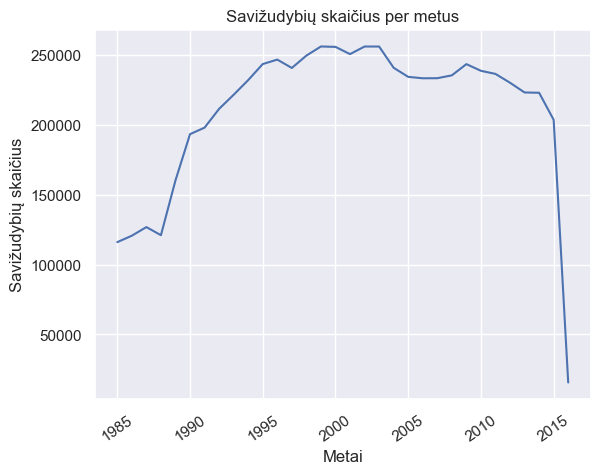

In [11]:

sns.lineplot(x='year', y='suicides_no', data=grouped_data) 
plt.title('Savižudybių skaičius per metus')
plt.xlabel('Metai')
plt.ylabel('Savižudybių skaičius')
plt.xticks(rotation=35)

plt.show()

## 2. Lyties skirtumai: 


In [12]:
grouped_data_bySY = data.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()
grouped_data_bySY

,year,sex,suicides_no
0,1985,female,32479
1,1985,male,83584
2,1986,female,33852
3,1986,male,86818
4,1987,female,35006
...,...,...,...
59,2014,male,171428
60,2015,female,47248
61,2015,male,156392
62,2016,female,3504


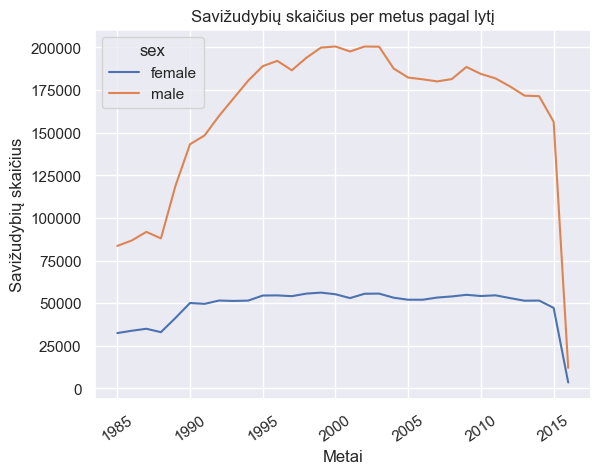

In [13]:
grouped_data_2 = data.groupby('sex')['suicides_no'].sum().reset_index()
sns.lineplot(x='year', y='suicides_no', hue='sex', data=grouped_data_bySY)
plt.title('Savižudybių skaičius per metus pagal lytį')
plt.xlabel('Metai')
plt.ylabel('Savižudybių skaičius')
plt.xticks(rotation=35)
plt.show()

## 3. Amžiaus grupių įtaka

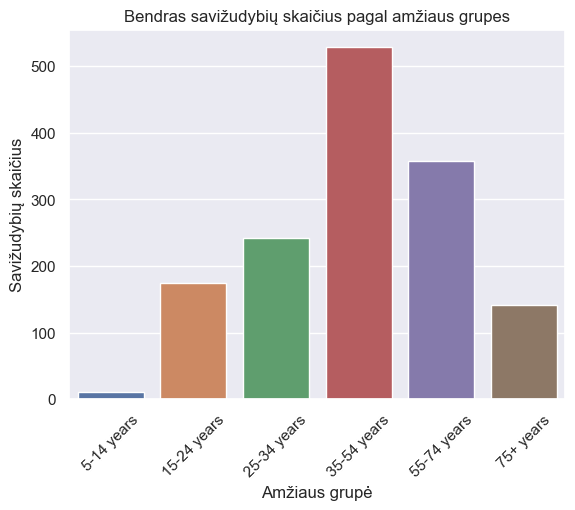

In [14]:
age_order = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"]
sns.barplot(x='age', y='suicides_no', data=data, errorbar=None, order = age_order)
plt.title('Bendras savižudybių skaičius pagal amžiaus grupes')
plt.xlabel('Amžiaus grupė')
plt.ylabel('Savižudybių skaičius')
plt.xticks(rotation=45)
plt.show()


## 4. Top 10 šalių, kuriose užfiksuotas didžiausias bendras savižudybių skaičius

In [27]:
data_grouped_by_country = data.groupby('country')['suicides_no'].sum().reset_index()
top_10_suicide_countries = data_grouped_by_country.sort_values(by='suicides_no', ascending=False).head(10)

top_10_suicide_countries['Rank'] = range(1, len(top_10_suicide_countries) + 1)
top_10_suicide_countries['Rank'] = 'Top ' + top_10_suicide_countries['Rank'].astype(str)

top_10_suicide_countries[['Rank', 'country', 'suicides_no']]

,Rank,country,suicides_no
75,Top 1,Russian Federation,1209742
98,Top 2,United States,1034013
46,Top 3,Japan,806902
33,Top 4,France,329127
95,Top 5,Ukraine,319950
35,Top 6,Germany,291262
73,Top 7,Republic of Korea,261730
15,Top 8,Brazil,226613
69,Top 9,Poland,139098
97,Top 10,United Kingdom,136805


## 4. Top metai, kai buvo užfiksuotas didžiausias bendras savižudybių skaičius

In [25]:
data_grouped_by_year = data.groupby('year')['suicides_no'].sum().reset_index()
top_10_suicide_year = data_grouped_by_year.sort_values(by='suicides_no', ascending=False).head(10)

top_10_suicide_year['Rank'] = range(1, len(top_10_suicide_year)+1)
top_10_suicide_year['Rank'] = 'Top '+ top_10_suicide_year['Rank'].astype(str)

top_10_suicide_year[['Rank', 'year', 'suicides_no']]

,Rank,year,suicides_no
14,Top 1,1999,256119
17,Top 2,2002,256095
18,Top 3,2003,256079
15,Top 4,2000,255832
16,Top 5,2001,250652
13,Top 6,1998,249591
11,Top 7,1996,246725
10,Top 8,1995,243544
24,Top 9,2009,243487
19,Top 10,2004,240861
